In [31]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [32]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [33]:
dados.columns = ["nao_usar","milhas_por_ano","ano_do_modelo", "preco","vendido"]
dados.head()

,nao_usar,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [34]:
vendido_troca  ={
    "no": 0,
    "yes":1
}

dados.vendido = dados.vendido.map(vendido_troca)
dados.head()

,nao_usar,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [35]:
from datetime import datetime
today_year = datetime.today().year
dados["idade_do_modelo"] =today_year - dados.ano_do_modelo
dados.head()

,nao_usar,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [36]:
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934
dados.head()

,nao_usar,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [37]:
dados = dados.drop(columns=["nao_usar","milhas_por_ano","ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

x = dados[["preco","idade_do_modelo","km_por_ano"]]
y = dados["vendido"]


SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)

modelo =  LinearSVC(random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x),len(teste_x)))
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)


print("Taxa de acerto %.2f%%" % (taxa_de_acerto * 100))

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Taxa de acerto 58.28%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
from sklearn.dummy import DummyClassifier

dummy =  DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)

print("A acurácia do algoritmo Dummy foi de %.2f%%" % (acuracia * 100))

A acurácia do algoritmo Dummy foi de 50.12%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [40]:
from sklearn.dummy import DummyClassifier

dummy =  DummyClassifier(random_state = SEED)
dummy.fit(treino_x, treino_y)
acuracia = dummy.score(teste_x, teste_y)

print("A acurácia do algoritmo Dummy foi de %.2f%%" % (acuracia * 100))

A acurácia do algoritmo Dummy foi de 51.92%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [41]:
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


SEED = 8
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)

modelo = SVC(random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(raw_treino_x),len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)

print("A acurácia do algoritmo Dummy foi de %.2f%%" % (acuracia * 100))


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do algoritmo Dummy foi de 77.56%


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


SEED = 8
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)

modelo = DecisionTreeClassifier(random_state = SEED, max_depth=3)
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(raw_treino_x),len(raw_teste_x)))


modelo.fit(raw_treino_x, treino_y)

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)

print("A acurácia do algoritmo Dummy foi de %.2f%%" % (acuracia * 100))


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do algoritmo Dummy foi de 58.00%


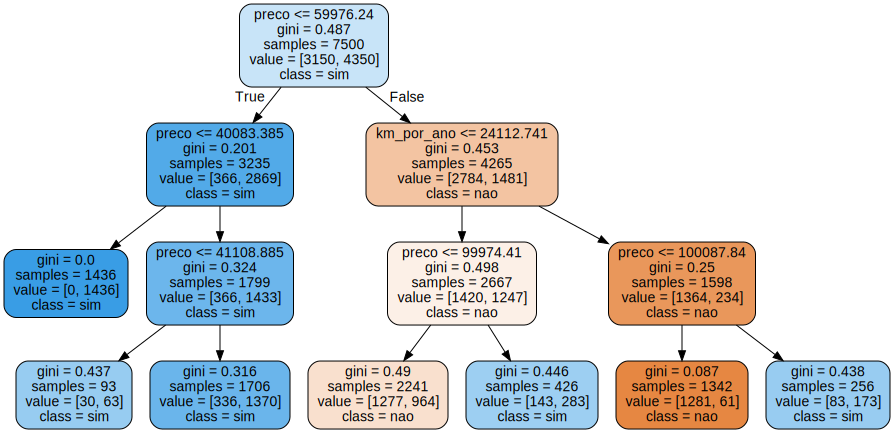

In [43]:
from sklearn.tree import export_graphviz
import graphviz 

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, 
                           filled=True,
                           rounded=True,
                           feature_names=features,
                           class_names=["nao","sim"])
grafikos = graphviz.Source(dot_data)
grafikos